# Hierarchical Clustering



## Introduction


In the previous chapter, you have learned K-Means and it's varients. In K-Means algorithm, you had to explicitly specify the number of clusters required. This can sometimes be difficult because we may not exactly know the number of clusters to begin with. To this rescue comes the hierarchical clustering. In hierarchical clustering, you do not need to specify the number of clusters because it does not generate a specific number of clusters rather it generates hierarchy of clusters. Furthermore, the final result of K-Means depends on the initialization of the centroids which in most case is a random process; hence, making the final result random. But, most of the time the result in hierarchical clustering is deterministic which is required in many applications.

In this chapter, you are going to learn about the hierarchical clustering and understand how it solves the problems of partition based clustering like *K-Means*. First off, let's learn some of the key terminologies that are important in hierarchical clustering.


### Proximity Matrix
Let us assume that we have following data points $D = \{x_1, x_2, x_3, x_4\}$. The proximity matrix given below tells us about the dissimilarity or distance between two data points.
$$
\mathbf{\mathcal D} = \begin{bmatrix}0 & 0.2 & 1.0 & 2\\
0.2 & 0 & 0.6 & 0.1\\
0.1 & 0.2 & 0 & 0.5\\
2 & 0.1 & 0.5 & 0
\end{bmatrix}
$$

The distance matrix $\mathbf{\mathcal D}$ for four data points is of size $4\times 4$. Also, $\mathbf{\mathcal D}_{i,j}$ denotes the distance between $x_i$ and $x_j$ given as,
$$
\mathbf{\mathcal D}_{i,j} = d(x_i, x_j)
$$

If $d(x_i, x_j) = d(x_j, x_i) \hspace{0.2cm} \forall_{i,j} \hspace{0.2cm}$(changing order of data points), then the distance matrix would be a symmetric matrix.

Also, the proximity matrix can have either the distance or the similarity between the data points. The similarity measure for example can be cosine similarity and the distance measure can be euclidian distance.

Finding the correct proximity metric for the problem at hand can be challenging and there are no shortcuts in doing so. In most of the cases, the domain knowledge is used to find an optimal proximity metric. In this lesson, we will mainly focus on the euclidian distance.

In the hierarchical clustering, only the proximity matrix is required for making the hierarchy of clusters; hence, we do not actually need to know how the data are distributed in the space. This can be helpful in many real world applications.


### Nested Partition

Before moving forward, let's understand about nested partition and why we need it. The partition or cluster in general are represented with a set. Let's imagine we have the following dataset,
$$
\mathbf{\mathcal D} = \{x_1, \dots, x_n\}
$$

Now, a partition $\mathcal A$ splits the data into the subsets $\{\mathcal A_1, \dots, \mathcal A_m\}$ that satisfies the following,
$$
\mathcal A_i \cap \mathcal A_j = \phi \hspace{0.2cm}\forall_{i,j} \ i\neq j\\

Where $\cap$ represents intersection and $\pi$ is empty set. This equation means data points should belong to only one cluster.

and\\
\mathcal A_i \cup \dots \cup \mathcal A_m = \mathbf{\mathcal D}
$$

Here, $\cup$ represents the union set operation. This equation means by combining those disjoint sets $\mathcal A_i, \dots$, we can obtain the original set we began with.

Now, imagine a new partition $\mathcal B$ splits $\mathcal A$. For $\mathcal B$ to be nested in $\mathcal A$; we should be able to create the partitions of $\mathcal A$ by combining the partitions of $\mathcal B$. The combining operation refers to the union operation in this case.

__EXAMPLE:__

Let's say we have a sample dataset given as,
$$
\mathcal D = \{x_1, x_2, x_3, x_4, x_5, x_6, x_7\}
$$

Imagine the partition $\mathcal A$ splits it into,
$$
\mathcal A = \{(x_1, x_2, x_5, x_7), (x_3, x_4, x_6)\}
$$

As you can see, each partitions are disjoint and $\mathcal A$ contains all the element of the original set $\mathbf{\mathcal D}$.

With the next partition operation $\mathcal B$ in $\mathcal A$, we get the following result,
$$
\mathcal B = \{(x_1, x_5), (x_2, x_7), (x_3), (x_4, x_6)\}
$$

To determine if $\mathcal B$ is a nested partition or not, we can tey to combine the partitions in $\mathcal B$ in order to obtain $\mathcal A$.

In above example, partition $(x_1, x_2, x_5, x_7)$ can be created by combining the first and second partition of $\mathcal B$. Similarly, partition $(x_3, x_4, x_6)$ can be created by combining the third and fourth elements of $\mathcal B$; therefore, the partition $\mathcal B$ is a nested partition of $\mathcal A$.

Let's see an example where the new partition is not a nested partition. If we had splitted the partition $\mathcal A$ with $\mathcal B^\prime$ as follows,
$$
\mathcal B^\prime =\{(x_1, x_3), (x_2, x_5, x_7), (x_4, x_6)\}
$$

You can check that we would not be able to obtain our original partition $\mathcal A$ by merging the partitions of $\mathcal B^\prime$ making $\mathcal B^\prime$ not a nested partition.

Now, the nested partition comes in hierarchical clustering because the hierarchical clustering can be defined in terms of nested partition as follows:

'''A hierarchical clustering is a sequence of nested partition where each subsequent parititon is nested on the previous one.'''

So, in the above example, the sequence $\left[\mathcal D, \mathcal A, \mathcal B\right]$ is a hierarchical clustering, whereas $\left[\mathcal D, \mathcal A, \mathcal B^\prime\right]$ is not.


### Dendogram

A more convenient way of representing the hierarchical clustering is by using a tree like structure called _dendogram_. An example of dendogram is shown in the figure below:

<div align="center">
    <figure>


<p>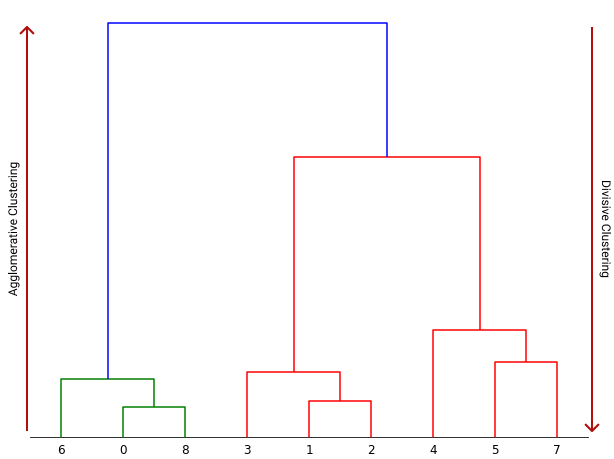</p>
        <figcaption>Figure 1: Dendogram with arrow showing agglomerative and divisive clustering.</figcaption>
    </figure>
</div>

In the above Figure, you can see that it is a binary tree representation where each node splits into two branches. Using the terminology of tree, we can say that the root node here represents the partition containing all the data points, each node represents a partition and finally the leaf nodes are singleton partition (partition containing only one element). Similarly, the height of each edge is proportional to the distance between two data points, two partitions or a data point and a partition.

In dendogram, the root node is just our dataset and the leaf node is just the data points, so they are of no use. Now, to get some required clusters in hierarchical clustering, we can cut the dendogram at any level shown by the dotted line parallel to $x$-axis.

One of the advantages of dendogram is that it gives an intuitive understanding of relationship between the clusters that can be very helpful in some application like taxonomy.


### Types of Clustering

Hierarchical clustering can be divided into two parts given in the list below:

+ Agglomerative Clustering

>Agglomerative clustering, also known as bottom-up hierarchical clustering, is a clustering approach where we start from the bottom of the hierarchy/dendogram and build the partition up until a specified stopping condition. The upward arrow in Figure 1 shows the process of agglomerative clustering where we start from singleton partition and build up the tree until we reach the root node.

+ Divisive Clustering

> Divisive clustering is the opposite of agglomerative clustering in the sense that the dendogram is created in top to bottom fashion. Initially all the datapoints belongs to a single cluster, then we iteratively apply the split until a stopping criteria is reached or all the clusters are singleton. The downward arrow in Figure 1 shows the process of divisive clustering.

In this chapter, you are going to learn about divisive clustering and in next chapter you will learn about agglomerative clustering.


## Divisive Clustering


Divisive clustering algorithm is a top-down approach where we start at the top of the tree (root node) and create clusters by spliting a single cluster into two clusters. The working of divisive hierarchical clustering algorithm is shown in the animation below.

<div align="center">
    <figure>


<p>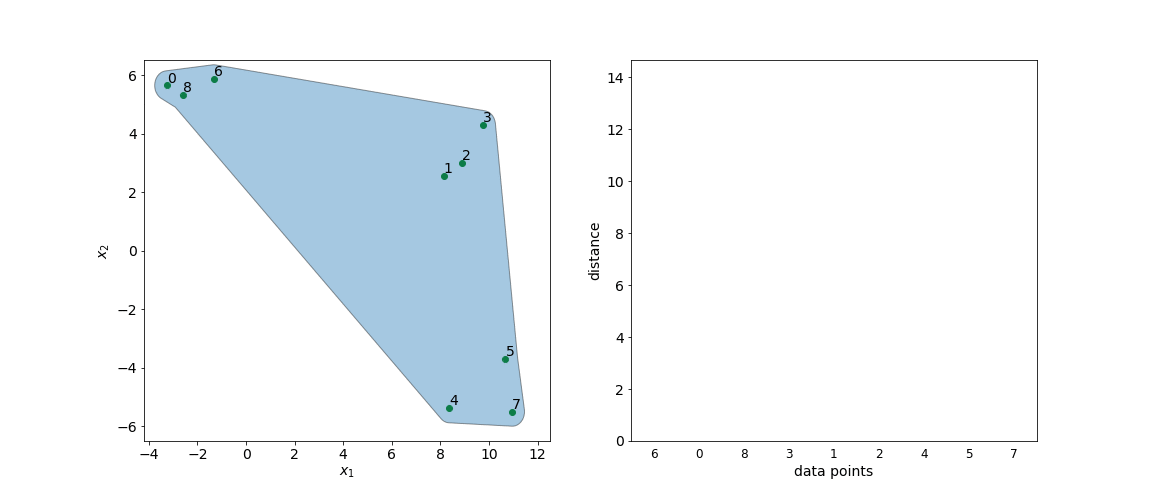</p>
        <figcaption>Figure 7: Divisive clustering on a toy dataset. (a) Scatter plot with highlighted clusters animation. (b) Divisive clustering shown in dendogram animation</figcaption>
    </figure>
</div>

In the Figure 3(a), the circular boundary around the data represents a cluster. With divisive clustering, you can see in the scatter plot (figure (a)) that we start by assigning all the data points to a single cluster, then we iteratively split the cluster to form smaller clusters until we reach the stopping condition or we obtain all the singleton cluster. In the dendogram plot in Figure 7(b), contrary to agglomerative clustering, we start from the root node of the binary tree and start the branch formation from the top to bottom fashion until we achieve all the leaf nodes as a singleton partitions.


### General Algorithm

A general divisive hierarchical clustering algorithm is given below,

<br>

---
__ALGORITHM__: General Divisive Hierarchical Clustering

---
Start with root node containing all the data points

__REPEAT:__
>
> Split parent cluster $C$ into two parts $C_a$ and $C_b$ using a split method
>
> Choose the next cluster from non-singleton leaf clusters with maximum value of squared error.
>
__UNTIL:__ All the leaves are singleton clusters

---

In the above algorithm, we talked about the splitting method but we did not go into the details. Also, we choose the next cluster using maximum squared error which is not the only way to do so. Here, we will discuss about some of the divisive method and criterion and also the method of choosing the next cluster for the split.
>
>+ Split method and criterion
>
> We should consider how are we going to split a given cluster into smaller ones. We can use Bisecting _K_-Means algorithm for this purpose. Also, if the data are categorical we can use the Gini-index.
>
>+ Choosing the cluster to split
>
> Choosing which cluster to split next can also be important when we are trying to achieve good results early on in the clustering.
>

We are going to cover DIANA divisive clustering algorithm in the following section in detail.


### DIANA Algorithm


DIANA (DIvisive ANAlysis) is a heuristic method for divisive clustering. 


Let's imagine we are trying to split the cluster $\mathcal C$ into two clusters $\mathcal C_a$ and $\mathcal C_b$. The DIANA algorithm for this purpose is given below:

---
__ALGORITHM:__ DIvisive ANAlysis (DIANA)

---
1. Assign all data of $C$ to $C_a$ and $C_b$ to an empty cluster.

2. For each data point in $C_a$, i.e $\mathbf x_i \in C_a$, do

    a. Compute the average distance of $x_i$ to all other data points as,
$$
d(\mathbf x_i, C_a\backslash\{\mathbf x_i\}) = \frac{1}{N_{c_a} - 1} \sum_{\mathbf x_j \in C_a\\ \ \ i\neq j}d(\mathbf x_i, \mathbf x_j)
$$

    b. For the remaining iteration, compute the difference between the average distance to $C_a$ and $C_b$ as,
$$
\begin{align}
D_i &= d(\mathbf x_i, C_a\backslash\{\mathbf x_i\}) - d(\mathbf x_i, C_b)\\
&= \frac{1}{N_{C_a} - 1} \sum_{\mathbf x_j \in C_a\\ \ \ i \neq j} d(\mathbf x_i, x_j) - \frac{1}{N_{C_b}} \sum_{\mathbf x_k \in C_b} d(\mathbf x_i, \mathbf x_k)
\end{align}
$$

3. a. For first iteration, add the data point $x_i$ with the maximum $D_i$ to the empty cluster $C_b$

    b.For iterations except first

    __IF:__ maximum value of $D$ is greater than zero given as,
    $$D_{max} = \max(D_1, D_2, \dots) \gt 0$$
    move the data point $x_{max}$ corresponding to $D_{max}$ to $C_b$

    Repeat Step 2(b) and 3(b)

    __OTHERWISE:__ stop
---

With this algorithm you will be able to cluster any given data points according to the divisive clustering approach.


# Agglomerative Hierarchical Clustering


Agglomerative clustering is the most popular hierarchical clustering algorithm. It is a bottom up approach, so we start by singleton clusters then merge the clusters until a stopping condition or all data belongs to a single cluster. For simplicity, we are going to stop the algorithm only when all the data points belongs to a single cluster. The process of agglomerative clustering algorithm is clearly shown in the animation below.

<div align="center">
    <figure>


<p>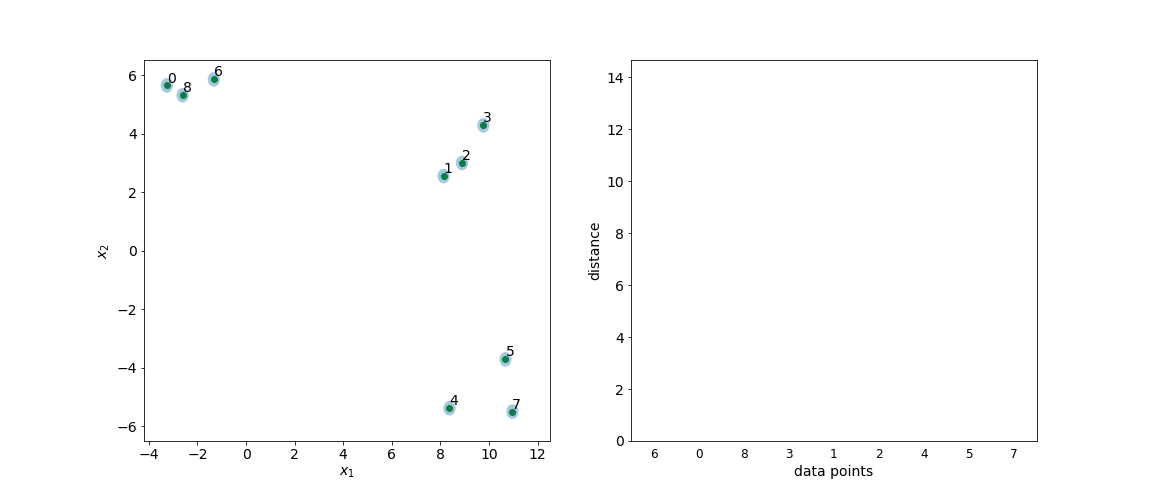</p>
        <figcaption>Figure 2: Agglomerative clustering on a toy dataset. (a) Scatter plot with highlighted clusters. (b) Agglomerative clustering shown in dendogram</figcaption>
    </figure>
</div>

The Figure 2(a) shows the iterative process where at each step two clusters are combined. The dendogram for the corresponding step in the Figure 2(a) is shown in the Figure(b).


### General Agglomerative Clustering Algorithm

Suppose we have a dataset given as $\mathcal x = \{x_1, \dots, x_n\}$. A general agglomerative clustering algorithm to partition this dataset is given below.

---
__ALGORITHM:__ General Agglomerative Clustering Algorithm

---
1. __Initialization:__

    a. Create an initial clustering $\mathcal C_0$ as,
$$
\mathcal A_0 = \{\mathcal C_i = \{x_i\}, i=1,\dots,n\}
$$

    b. Set time step $t = 0$

2. __REPEAT:__

    a. Increase the time step as, $t = t + 1$

    b. Calculate the proximity matrix for $\mathcal A_0$ (if required)

    c. Find a cluster $(\mathcal C_a, \mathcal C_b)$ from all the possible pairs of clusters $(\mathcal C_i, \mathcal C_j)$ in $\mathcal A_{t-1}$ using proximity matrix where,
$$
d(\mathcal C_a, \mathcal C_b) = \min_{i,j} D(\mathcal C_i, \mathcal C_j), \ \  i \neq j
$$

    Where $D(\cdot)$ is a dissimilarity or distance function.

    d. Create a new cluster $\mathcal C_k$ as,
$$
\mathcal C_k = \mathcal C_a \cup \mathcal C_b
$$

    e. Produce a new clustering $\mathcal A_t$ as,
$$
\mathcal A_t = (\mathcal A_{t-1} - \{\mathcal C_a, \mathcal C_b\}) \cup \{\mathcal C_k\}
$$

    __UNTIL:__ All data lie in a single cluster
---

In the above algorithm, all the steps are straight forward other than the dissimilarity function $d(\cdot)$ used when calculating the proximity matrix seems esoteric. The function $d(\cdot)$ calculates the distance between two data points, a data point and a cluster or two clusters. In the following section we are going go learn about various agglomerative clustering algorithms based on their different merge criterion.
